# Graphical Analysis of Diesel Price Direction and Inflation Indicator in Portugal (2017 to 2022)

## Portugal - Economia

Does the price of diesel (used in the transport of goods) have a visual correlation with the price of oil? Is inflation related to the prices of the previous items?

### Data Source
Petroleo Brent Euro (Brent Euro Oil):
https://bpstat.bportugal.pt/arvore/Precos/Precos_materias-primas?tab=vet

Infação (inflation):
https://bpstat.bportugal.pt/arvore/Precos/Inflacao/IPC?tab=vet

Preço do Gasóleo (diesel price):
https://precoscombustiveis.dgeg.gov.pt/estatistica/preco-medio-diario/#download

### The Choices

The objective is to visualize if and how much the two compared values are related. The scales have limits based on the period minimums and maximums, so the lines are drawn with the same proportion on their scales.

Excesses that do not compromise the analysis were removed, keeping what is necessary to carry out a direct analysis.

**truthfulness:** Data have not been altered or scales changed or irrelevant points highlighted to favor any conclusion.

**beauty:** was based on simplicity, on the use of colors that facilitate the visualization and combine with each other.

**functionality:** The chart focuses on demonstrating and answering questions for non-technicians or economists, focusing on reducing density and maintaining clarity.

**insightfulness:** Reduction of graphic elements to make the graphic more enlightening when comparing the data.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def read_price_fuel(fuel, group=True):
    

    df = pd.read_csv(fuel+'.csv', sep=';', usecols=['data', 'precoMedio'], parse_dates=['data'], infer_datetime_format=True)
    df['date yy-mm'] = df['data'].apply(lambda x: x.strftime('%y-%m'))
    df['precoMedio'].replace('€', '', regex=True, inplace=True)
    df['price'] = df['precoMedio'].replace(',', '.', regex=True).astype(float).round(3)
    df.drop(['data', 'precoMedio'], axis=1, inplace=True)
    if group:
        df = df.groupby('date yy-mm').agg({'price': ['mean', 'min', 'max']}).reset_index().round(3)
        df.columns = list(map(' '.join, df.columns.values))
        df.rename(columns={'date yy-mm ': 'date yy-mm'}, inplace=True)


        return df
    else:
        return df
        
def petr_ipc(data):
    df = pd.read_csv(data, sep=';', usecols=['Perodo de referncia', 'Valor'] , encoding_errors='ignore', parse_dates=['Perodo de referncia'], infer_datetime_format=True)
    df['date yy-mm'] = df['Perodo de referncia'].apply(lambda x: x.strftime('%y-%m'))
    df.drop(['Perodo de referncia'], axis=1, inplace=True)
    df.rename(columns={'Valor': 'value'}, inplace=True)
    
    return df[['date yy-mm', 'value']]

In [206]:
d_simple = read_price_fuel('d_simple')
d_simple_total = read_price_fuel('d_simple', group=False)

petr_brent_euro = petr_ipc('petr_brent_euro.csv')
ipc_total = petr_ipc('ipc_total.csv')

In [207]:
def graf(data1, data2, label1, label2, color1='grey' ,color2='#030764'):
    fig, ax1 = plt.subplots(figsize=(20,10))
    
    plt.title('Visual analysis of the directions (up and down) of indicators and prices', fontsize=30)
    
    x_1 = data1.iloc[:, 0]
    y_1 = data1.iloc[:, 1]
    
    ax1.plot(x_1 ,y_1, marker='*', color=color1)
    ax1.set_ylabel(label1, color=color1, fontsize=22)
    ax1.tick_params(rotation=90, axis='x')
    ax1.tick_params(labelsize=15, axis='both')
    ax1.spines.top.set_visible(False)



    ax2 = ax1.twinx()
    
    y_2 = data2.iloc[:, 1]
    
    ax2.plot(x_1, y_2, marker='o', color=color2)
    ax2.set_ylabel(label2, color=color2, fontsize=22)
    
    ax2.tick_params(labelsize=15, axis='both')
    
    ax1.spines[['right', 'left', 'top']].set_visible(False)
    ax2.spines[['right', 'left', 'top']].set_visible(False)
    
    plt.show()

In [208]:
def boxplot_interactive(data):
    boxplot = go.Figure()
    boxplot.add_trace(go.Box(x=data.iloc[:,0], y=data.iloc[:,1]))
    boxplot.update_layout(
        title='Diesel price from May 2017 to May 2022',
        yaxis_title='Diesel Price',
        autosize=False,
        width=950,
        height=500,
        margin=dict(l=0, r=20, b=20, t=60, pad=4),
        paper_bgcolor='LightSteelBlue')
    boxplot.show()

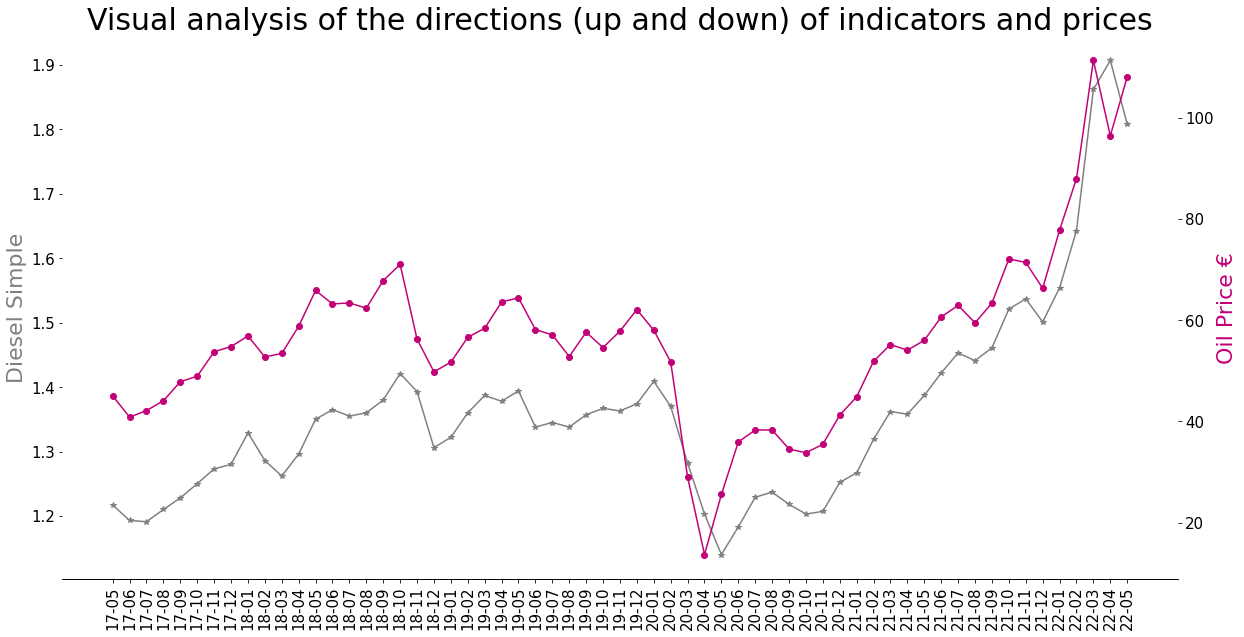

In [165]:
graf(d_simple, petr_brent_euro, 'Diesel Simple', 'Oil Price €',color2='#C20078')

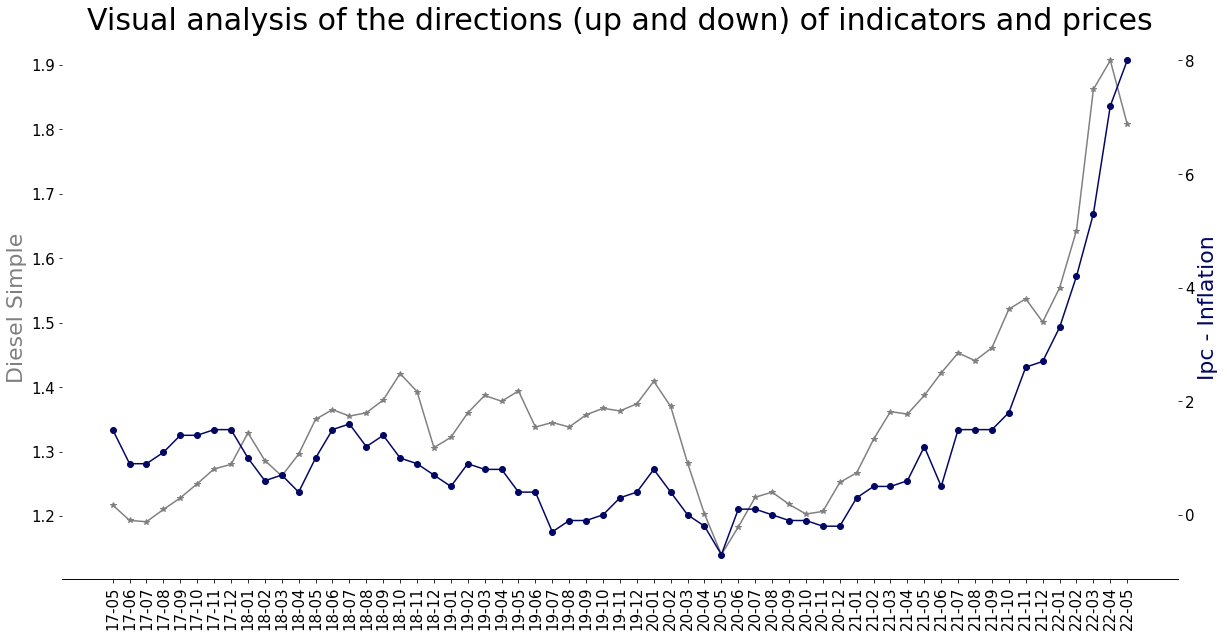

In [166]:
graf(d_simple, ipc_total, 'Diesel Simple', 'Ipc - Inflation')

In [205]:
boxplot_interactive(d_simple_total)